In [1]:
# Importing Libraries
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import sklearn
import numpy as np

In [2]:
NSE = yf.Ticker('^NSEI')

In [3]:
NSE = NSE.history(period = "max")

In [4]:
NSE

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00+05:30,19298.349609,19366.849609,19249.699219,19306.050781,248200,0.0,0.0
2023-08-29 00:00:00+05:30,19374.849609,19377.900391,19309.099609,19342.650391,307400,0.0,0.0
2023-08-30 00:00:00+05:30,19433.449219,19452.800781,19334.750000,19347.449219,233000,0.0,0.0


In [5]:
NSE.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2023-08-21 00:00:00+05:30', '2023-08-22 00:00:00+05:30',
               '2023-08-23 00:00:00+05:30', '2023-08-24 00:00:00+05:30',
               '2023-08-25 00:00:00+05:30', '2023-08-28 00:00:00+05:30',
               '2023-08-29 00:00:00+05:30', '2023-08-30 00:00:00+05:30',
               '2023-08-31 00:00:00+05:30', '2023-09-01 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=3913, freq=None)

<Axes: xlabel='Date'>

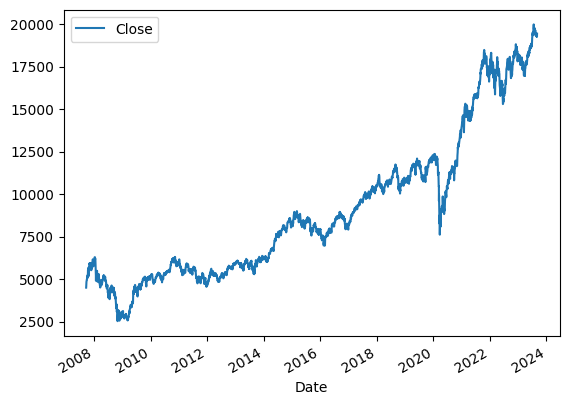

In [6]:
NSE.plot.line(y="Close", use_index = True)

In [7]:
del NSE["Dividends"]
del NSE["Stock Splits"]

In [8]:
NSE["Tomorrow"] = NSE["Close"].shift(-1)

In [9]:
NSE

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2023-08-28 00:00:00+05:30,19298.349609,19366.849609,19249.699219,19306.050781,248200,19342.650391
2023-08-29 00:00:00+05:30,19374.849609,19377.900391,19309.099609,19342.650391,307400,19347.449219
2023-08-30 00:00:00+05:30,19433.449219,19452.800781,19334.750000,19347.449219,233000,19253.800781


In [10]:
NSE["Target"] = (NSE["Tomorrow"] > NSE['Close']).astype(int)

In [11]:
NSE

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2023-08-28 00:00:00+05:30,19298.349609,19366.849609,19249.699219,19306.050781,248200,19342.650391,1
2023-08-29 00:00:00+05:30,19374.849609,19377.900391,19309.099609,19342.650391,307400,19347.449219,1
2023-08-30 00:00:00+05:30,19433.449219,19452.800781,19334.750000,19347.449219,233000,19253.800781,0


In [12]:
#define ticker and fetch records
stock = input("enter a Ticker\n")
start_date = input("Enter start date to fetch records in yyyy-mm-dd format")
end_date = input("Enter end date to fetch records in yyyy-mm-dd format")

data = yf.download(stock, start = start_date , end = end_date)

print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.430313   
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.782074   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.906265   
2023-02-16  153.509995  156.330002  153.350006  153.710007  153.290680   
2023-02-17  152.350006  153.000000  150.850006  152.550003  152.133850   
...                ...         ...         ...         ...         ...   
2023-08-25  177.380005  179.149994  175.820007  178.610001  178.610001   
2023-08-28  180.089996  180.589996  178.550003  180.190002  180.190002   
2023-08-29  179.699997  184.899994  179.500000  184.119995  184.119995   
2023-08-30  184.940002  187.850006  184.740005  187.649994  187.649994   
2023-08-31  187.839996  189.119995  187.479

In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.430313,62199000
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.782074,61707600
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.906265,65573800
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.290680,68167900
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.133850,59144100
...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51418700
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.430313,62199000
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.782074,61707600
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.906265,65573800
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.290680,68167900
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.133850,59144100


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2023-02-13 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       139 non-null    float64
 1   High       139 non-null    float64
 2   Low        139 non-null    float64
 3   Close      139 non-null    float64
 4   Adj Close  139 non-null    float64
 5   Volume     139 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.6 KB


In [17]:
#Making date as a feature
df['date'] = pd.to_datetime(df.index)

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.430313,62199000,2023-02-13
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.782074,61707600,2023-02-14
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.906265,65573800,2023-02-15
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.290680,68167900,2023-02-16
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.133850,59144100,2023-02-17
...,...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51418700,2023-08-25
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700,2023-08-28
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900,2023-08-29


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.430313,62199000,2023-02-13
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.782074,61707600,2023-02-14
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.906265,65573800,2023-02-15
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.290680,68167900,2023-02-16
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.133850,59144100,2023-02-17


In [20]:
# Making a Candlestick graph
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                     open= df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close'])])
# Updating the layout
fig.update_layout(
    title = 'Stock Price Chart',
    yaxis_title = 'Price(rupees)',
    xaxis_rangeslider_visible = False
)


fig.show()

In [21]:
# Dropping date and volume to make it less complex
df.drop(['date', 'Volume'], axis = 1 , inplace = True)

In [22]:
df.reset_index(drop=True, inplace = True)

In [23]:
df

,Open,High,Low,Close,Adj Close
0,150.949997,154.259995,150.919998,153.850006,153.430313
1,152.119995,153.770004,150.860001,153.199997,152.782074
2,153.110001,155.500000,152.880005,155.330002,154.906265
3,153.509995,156.330002,153.350006,153.710007,153.290680
4,152.350006,153.000000,150.850006,152.550003,152.133850
...,...,...,...,...,...
134,177.380005,179.149994,175.820007,178.610001,178.610001
135,180.089996,180.589996,178.550003,180.190002,180.190002
136,179.699997,184.899994,179.500000,184.119995,184.119995
137,184.940002,187.850006,184.740005,187.649994,187.649994


<Axes: >

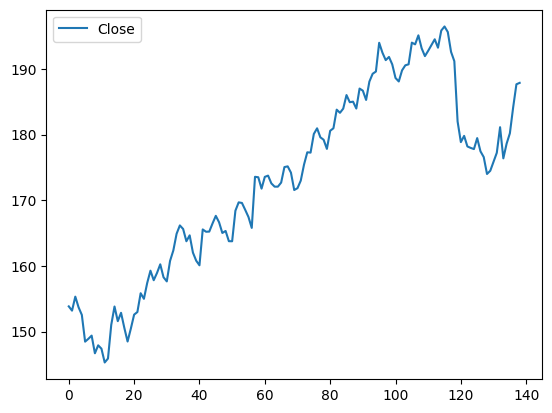

In [24]:
df.plot.line(y="Close", use_index = True)

In [25]:
df.reset_index(drop=True, inplace = True)

R-squared (R²) Score: 0.998177821506649


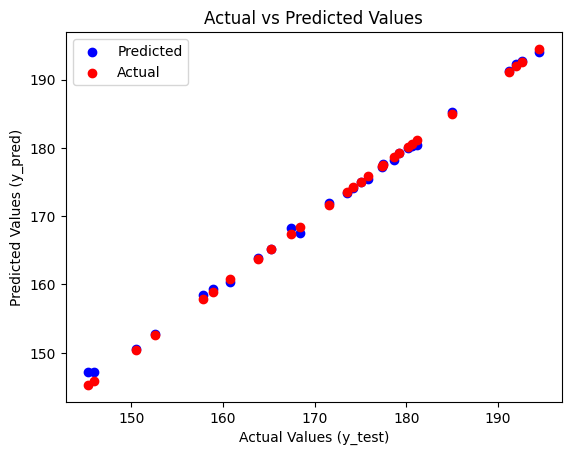

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Features
X = df[['Open','Close', 'High', 'Low', 'Adj Close']]
# Target Values
y = df['Close']

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
#Training
rf.fit(X_train.values, y_train.values)

y_pred = rf.predict(X_test.values)

# Using R-squared to check accuracy in the model
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

# Scatter plot of y_pred and y_test
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Values (y_test)')
#plt.ylabel('Predicted Values (y_pred)')
#plt.title('Actual vs Predicted Values')
#plt.show()

plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Scatter plot for y_pred with blue color
plt.scatter(y_test, y_test, color='red', label='Actual')  # Scatter plot for y_test with red color
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()  # Add legend to differentiate the scatter plots
plt.show()

In [27]:
df.tail()

,Open,High,Low,Close,Adj Close
134,177.380005,179.149994,175.820007,178.610001,178.610001
135,180.089996,180.589996,178.550003,180.190002,180.190002
136,179.699997,184.899994,179.500000,184.119995,184.119995
137,184.940002,187.850006,184.740005,187.649994,187.649994
138,187.839996,189.119995,187.479996,187.869995,187.869995


In [28]:
#Inputting Value of features
initial_array = np.array([['x', 'y', 'z', 'a', 'b']])
updated_array = np.concatenate((initial_array[:-1], df.tail(1).values))
print(updated_array)

#Predicting
predicted_price = rf.predict(updated_array)

print(predicted_price[0])

[['187.83999633789062' '189.1199951171875' '187.47999572753906'
  '187.8699951171875' '187.8699951171875']]
188.37439819335938
